#  MEMPREDIKSI KEMAMPUAN KONSUMEN DALAM MELUNASI PINJAMAN

Dalam memprediksi kemampuan pelanggan digunakan sebuah machine learning berbasis python untuk mengetahui tingkat kemampuan konsumen dalam melunasi pinjaman di Home Credit Indonesia.

Berikut adalah langkah langkah yang akan dilewati pada notebook ini:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


# 1. Problem Definition
Membuat sebuah model machine learning yang mampu untuk memprediksi kemampuan dari konsumen untuk membayar pinjaman, sehingga diharapkan output dari model mampu memberikan keputusan yang tepat terhadap calon konsumen kedepannya dengan melihat potensi dalam melunasi pinjaman tersebut.


# 2. Data
Data yang digunakan dalam membuat model berasal dari Rakamin Academy dan juga Home Credit Indonesia sebagai tugas akhir dari program Virtual Internship Experience Home Credit Indonesia. https://www.rakamin.com/virtual-internship-experience

Data tersebut juga dapat diunduh pada link berikut. https://www.kaggle.com/c/home-credit-default-risk

# 3. Evaluation


# Preparing Dataset

### Importing Library

In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

warnings.filterwarnings('ignore')
%matplotlib inline

### Importing Data

In [3]:
application_train = pd.read_csv('application_train.csv')
prev_application = pd.read_csv('previous_application.csv')
biro = pd.read_csv('bureau.csv')

In [4]:
print('Application Train Shape: ', application_train.shape)
application_train.head()

Application Train Shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print('Prev Application Shape: ', prev_application.shape)
prev_application.head()

Prev Application Shape:  (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print('Bereau Shape: ', biro.shape)
biro.head()

Bereau Shape:  (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


#### Description
* application_train :
    * This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
    * Static data for all applications. One row represents one loan in our data sample.
    
* previous_application :
    * All previous applications for Home Credit loans of clients who have loans in our sample.
    * There is one row for each previous application related to loans in our data sample.
    
* bureau :
    * All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
    * For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.




In [7]:
key_prev_app = prev_application.groupby(['SK_ID_CURR'])['SK_ID_CURR'].agg(['count']).reset_index()
key_prev_app.columns = ['SK_ID_CURR','TOTAL_PREV_APP']
print('Key Prev App Shape: ', key_prev_app.shape)
key_prev_app.head()

Key Prev App Shape:  (338857, 2)


,SK_ID_CURR,TOTAL_PREV_APP
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


In [8]:
key_biro = biro.groupby(['SK_ID_CURR'])['SK_ID_CURR'].agg(['count']).reset_index()
key_biro.columns = ['SK_ID_CURR','TOTAL_BUREAU_LOAN']
print('Key Prev App Shape: ', key_biro.shape)
key_biro.head()

Key Prev App Shape:  (305811, 2)


,SK_ID_CURR,TOTAL_BUREAU_LOAN
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


# EDA (Exploratory Data Analysis)

* Missing Value
* Duplicated Data
* Feature Distribution

#### Join Data

In [9]:
data = application_train.merge(key_prev_app, how = 'left', on = 'SK_ID_CURR')

In [10]:
data = data.merge(key_biro, how = 'left', on = 'SK_ID_CURR')

In [11]:
print(data.shape)
data.head()

(307511, 124)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0


### Check Missing Value

In [12]:
count = data.isnull().sum().sort_values(ascending=False)
percentage = ((data.isnull().sum()/len(data)*100)).sort_values(ascending=False)

data_missing = pd.concat([count, percentage],
                                axis =1,
                                keys = ['count', 'percentage']).reset_index()
data_missing.loc[data_missing['percentage'] > 25]

,index,count,percentage
0,COMMONAREA_MODE,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MEDI,214865,69.872297
3,NONLIVINGAPARTMENTS_AVG,213514,69.432963
4,NONLIVINGAPARTMENTS_MODE,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MEDI,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MODE,210199,68.354953


In [13]:
(data_missing.loc[data_missing['percentage'] >0]).shape

(69, 3)

Dataframe memiliki total 124 kolom dan berdasarkan data diatas ditemukan bahwa sebanyak 69 data memiliki kehilangan data dan 50 diantaranya memiliki kehilangan data diatas 25% dari total data.

#### Check Duplicated Rows

In [14]:
data.duplicated().sum()

0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 124 entries, SK_ID_CURR to TOTAL_BUREAU_LOAN
dtypes: float64(67), int64(41), object(16)
memory usage: 293.3+ MB


In [16]:
data.dtypes.value_counts()

float64    67
int64      41
object     16
dtype: int64

In [17]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Feature Distribution

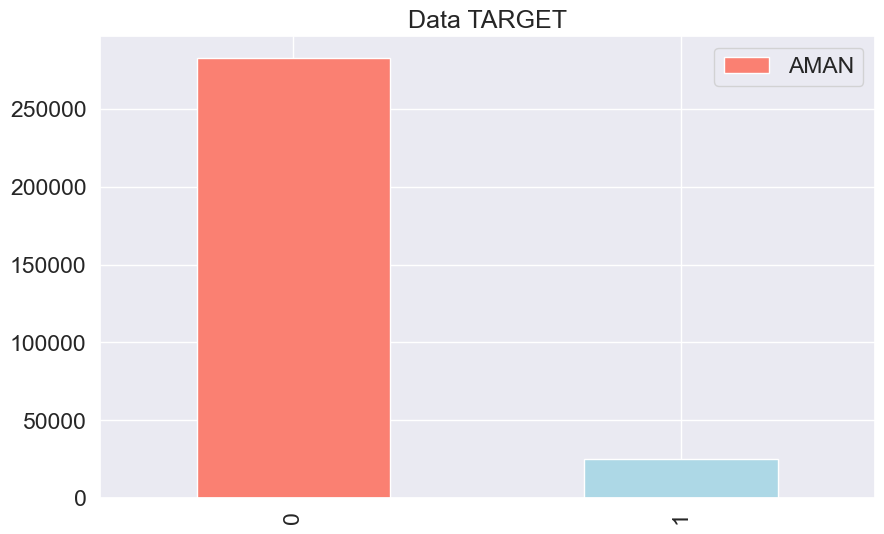

In [151]:
data["TARGET"].value_counts().plot(kind="bar",figsize=(10, 6), color=["salmon", "lightblue"]);

plt.title("Data TARGET")
plt.legend(["AMAN", "TIDAK AMAN"])

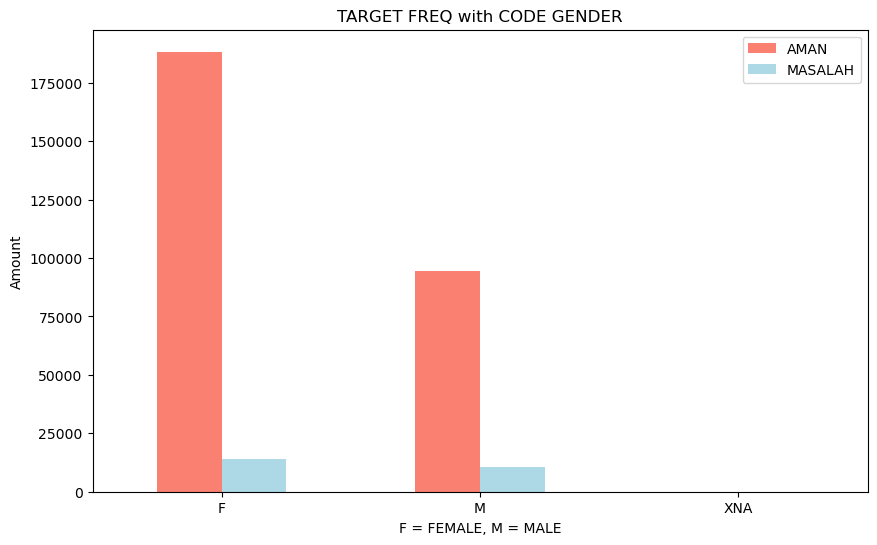

In [19]:
pd.crosstab(application_train['CODE_GENDER'], application_train['TARGET']).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("TARGET FREQ with CODE GENDER")
plt.xlabel("F = FEMALE, M = MALE")
plt.ylabel("Amount")
plt.legend(["AMAN", "MASALAH"]);
plt.xticks(rotation=0);

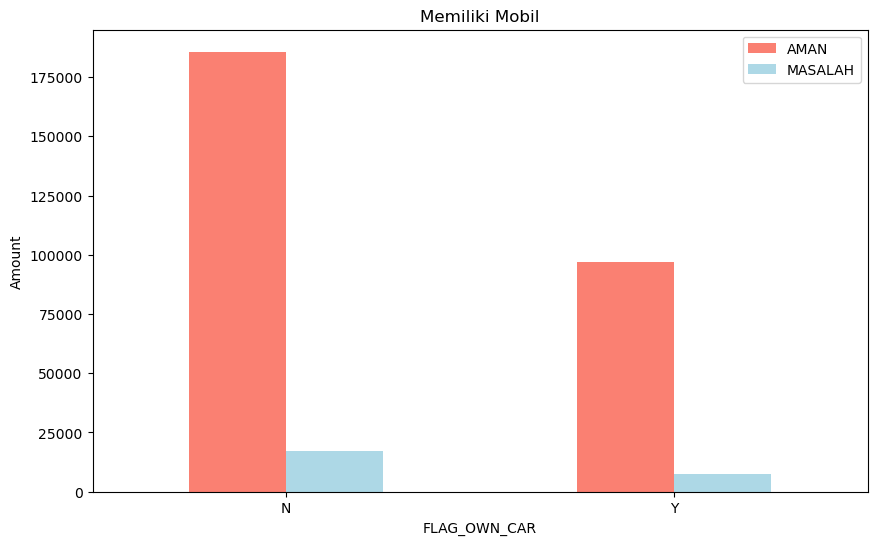

In [20]:
pd.crosstab(application_train['FLAG_OWN_CAR'], application_train['TARGET']).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Memiliki Mobil")
plt.ylabel("Amount")
plt.legend(["AMAN", "MASALAH"]);
plt.xticks(rotation=0);

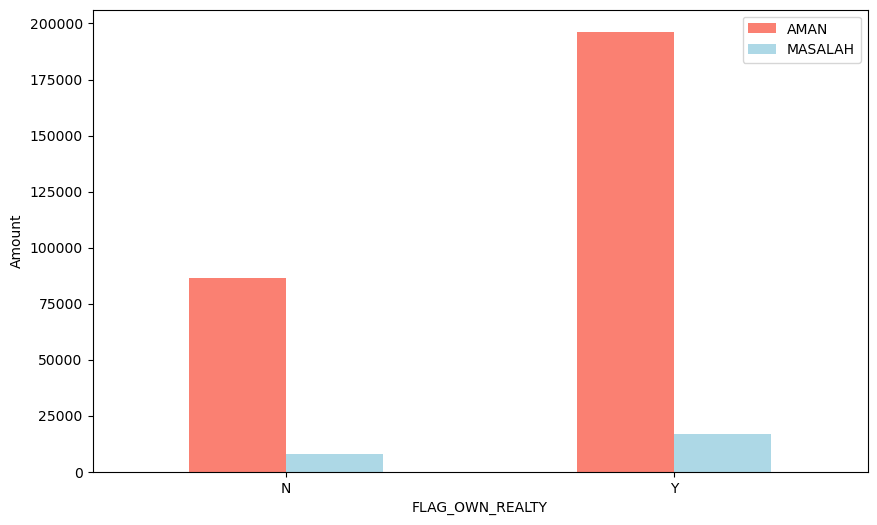

In [21]:
pd.crosstab(application_train['FLAG_OWN_REALTY'], application_train['TARGET']).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])



plt.ylabel("Amount")
plt.legend(["AMAN", "MASALAH"]);
plt.xticks(rotation=0);

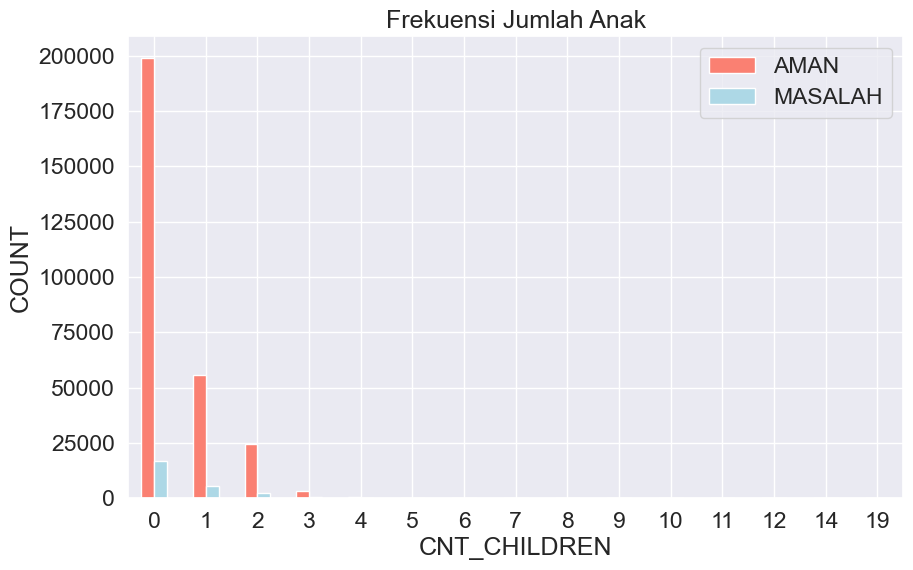

In [152]:
pd.crosstab(application_train['CNT_CHILDREN'],application_train['TARGET'] ).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Frekuensi Jumlah Anak")
plt.xlabel("CNT_CHILDREN")
plt.ylabel("COUNT")
plt.legend(["AMAN", "MASALAH"]);
plt.xticks(rotation=0);

In [23]:
data['EXT_SOURCE_1'].describe()

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

In [24]:
data['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [25]:
data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

## Data Preprocessing
* Feature Engineering
* Replace/Drop missing Value
* Scaling Numerical Feature
* Imbalance handling
* Feature Encoding

In [26]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


#### Converting Days Birth to AGE

In [27]:
data['DAYS_BIRTH'] = data['DAYS_BIRTH']*-1/365
data['DAYS_BIRTH'] = np.floor(data['DAYS_BIRTH'])
data['DAYS_BIRTH'] = data['DAYS_BIRTH'].astype('int')
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [28]:
data.columns = data.columns.str.replace('DAYS_BIRTH', 'AGE')

In [29]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0


In [156]:
data.AGE.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [158]:
data_age = data[['TARGET', 'AGE']]
data_age['AGE_GROUP'] = pd.cut(data_age['AGE'], bins = np.linspace(20, 70, num=6))
data_age = (data_age.groupby(['AGE_GROUP']).mean()).sort_values('TARGET')
data_age

,TARGET,AGE
AGE_GROUP,,
"(60.0, 70.0]",0.049203,63.471329
"(50.0, 60.0]",0.059334,55.402793
"(40.0, 50.0]",0.075510,45.246233
"(30.0, 40.0]",0.092869,35.610356
"(20.0, 30.0]",0.113985,26.691393


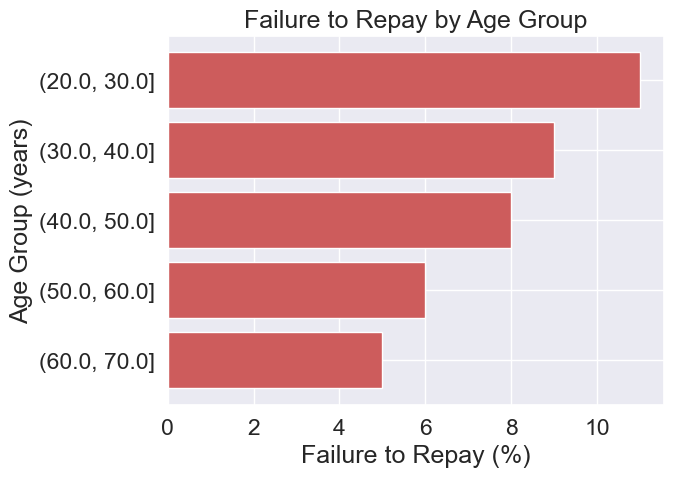

In [159]:
plt.barh(data_age.index.astype(str), round(100*data_age['TARGET']), color='indianred')

plt.ylabel('Age Group (years)')
plt.xlabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');
plt.show()

Pengguna yang memiliki kegagalan pembayaran paling rentan adalah pada usia 20-30. Dan berdasarkan data diatas didapatkan bahwa semakin rendah usia peminjam maka semakin besar juga peluang kegagalan pembayaran.

#### Converting Day Employed to years

In [32]:
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED']*-1/365
data['DAYS_EMPLOYED'] = np.floor(data['DAYS_EMPLOYED'])
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].astype('int')
data['DAYS_EMPLOYED']

0            1
1            3
2            0
3            8
4            8
          ... 
307506       0
307507   -1001
307508      21
307509      13
307510       3
Name: DAYS_EMPLOYED, Length: 307511, dtype: int32

In [33]:
data.columns = data.columns.str.replace('DAYS_EMPLOYED', 'YEARS_EMPLOYED')

In [34]:
data['YEARS_EMPLOYED'].describe()

count    307511.000000
mean       -175.301765
std         386.995277
min       -1001.000000
25%           0.000000
50%           3.000000
75%           7.000000
max          49.000000
Name: YEARS_EMPLOYED, dtype: float64

Terlihat tedapat outliers

In [35]:
data['YEARS_EMPLOYED'].replace({data['YEARS_EMPLOYED'].min(): np.nan}, inplace=True)

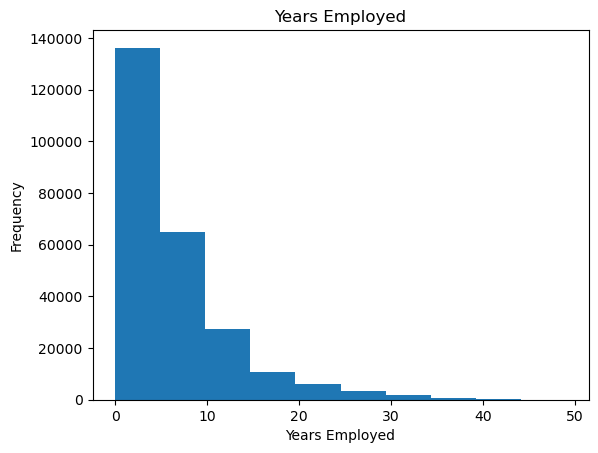

In [36]:
data['YEARS_EMPLOYED'].plot.hist(title = 'Years Employed')
plt.xlabel('Years Employed');

In [160]:
data_age = data[['TARGET', 'YEARS_EMPLOYED']]
data_age['YEARS_EMPLOYED_GROUP'] = pd.cut(data_age['YEARS_EMPLOYED'], bins = np.linspace(0, 50, num=6))
data_age = (data_age.groupby(['YEARS_EMPLOYED_GROUP']).mean()).sort_values('TARGET')
data_age

,TARGET,YEARS_EMPLOYED
YEARS_EMPLOYED_GROUP,,
"(40.0, 50.0]",0.005714,42.662857
"(30.0, 40.0]",0.031171,34.068239
"(20.0, 30.0]",0.045665,24.500773
"(10.0, 20.0]",0.052545,14.225580
"(0.0, 10.0]",0.082990,4.172613


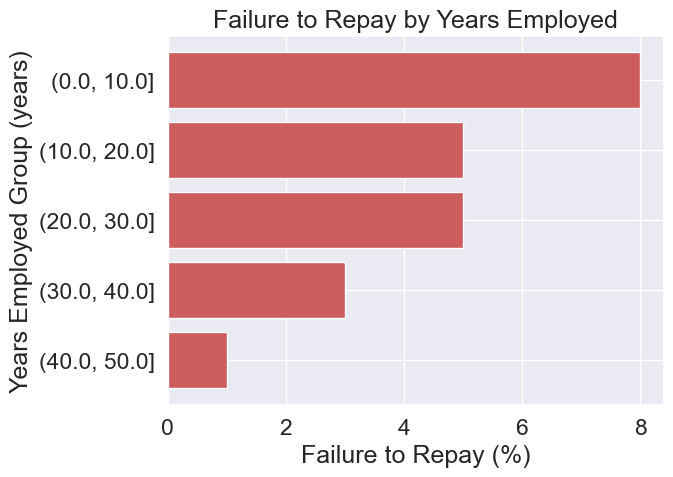

In [161]:
plt.barh(data_age.index.astype(str), round(100*data_age['TARGET']), color='indianred')

plt.ylabel('Years Employed Group (years)')
plt.xlabel('Failure to Repay (%)')
plt.title('Failure to Repay by Years Employed');
plt.show()

In [39]:
data['DAYS_REGISTRATION'] = data['DAYS_REGISTRATION']*-1/365
data['DAYS_REGISTRATION'] = np.floor(data['DAYS_REGISTRATION'])
data['DAYS_REGISTRATION'] = data['DAYS_REGISTRATION'].astype('int')
data['DAYS_REGISTRATION']

0          9
1          3
2         11
3         26
4         11
          ..
307506    23
307507    12
307508    18
307509     7
307510    14
Name: DAYS_REGISTRATION, Length: 307511, dtype: int32

In [40]:
data.columns = data.columns.str.replace('DAYS_REGISTRATION', 'YEARS_REGISTRATION')

In [41]:
data['YEARS_REGISTRATION'].describe()

count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64

In [42]:
data['YEARS_REGISTRATION']

0          9
1          3
2         11
3         26
4         11
          ..
307506    23
307507    12
307508    18
307509     7
307510    14
Name: YEARS_REGISTRATION, Length: 307511, dtype: int32

In [43]:
data_regist = data[['TARGET', 'YEARS_REGISTRATION']]
data_regist['YEARS_REGISTRATION_GROUP'] = pd.cut(data_regist['YEARS_REGISTRATION'], bins = np.linspace(0, 50, num=6))
data_regist = (data_regist.groupby(['YEARS_REGISTRATION_GROUP']).mean()).sort_values('TARGET')
data_regist

,TARGET,YEARS_REGISTRATION
YEARS_REGISTRATION_GROUP,,
"(40.0, 50.0]",0.043189,43.102159
"(30.0, 40.0]",0.056150,34.121579
"(20.0, 30.0]",0.065100,24.724793
"(10.0, 20.0]",0.081349,14.960309
"(0.0, 10.0]",0.088611,5.160632


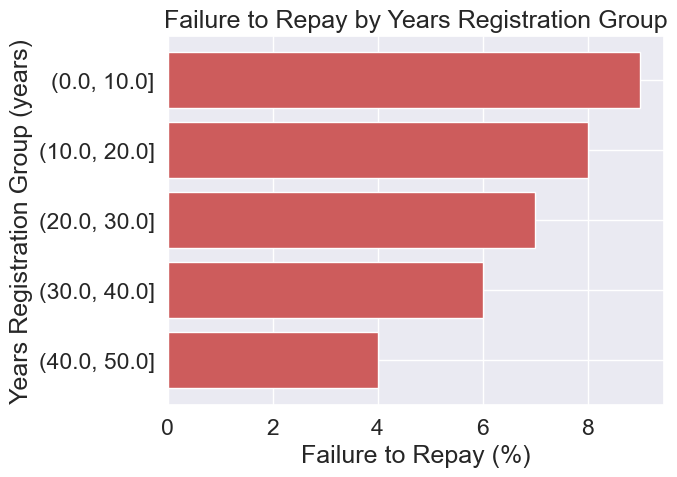

In [155]:
plt.barh(data_regist.index.astype(str), round(100*data_regist['TARGET']), color='indianred')

plt.ylabel('Years Registration Group (years)')
plt.xlabel('Failure to Repay (%)')
plt.title('Failure to Repay by Years Registration Group');
plt.show()

#### Converting Days ID to years

In [45]:
data['DAYS_ID_PUBLISH'] = data['DAYS_ID_PUBLISH']*-1/365
data['DAYS_ID_PUBLISH'] = np.floor(data['DAYS_ID_PUBLISH'])
data['DAYS_ID_PUBLISH'] = data['DAYS_ID_PUBLISH'].astype('int')
data['DAYS_ID_PUBLISH']

0          5
1          0
2          6
3          6
4          9
          ..
307506     5
307507    11
307508    14
307509     2
307510     1
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int32

In [46]:
data.columns = data.columns.str.replace('DAYS_ID_PUBLISH', 'YEARS_ID_PUBLISH')

In [47]:
data['YEARS_ID_PUBLISH'].describe()

count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: YEARS_ID_PUBLISH, dtype: float64

In [48]:
data_publish = data[['TARGET', 'YEARS_ID_PUBLISH']]
data_publish['YEARS_ID_PUBLISH_GROUP'] = pd.cut(data_publish['YEARS_ID_PUBLISH'], bins = np.linspace(0, 20, num=6))
data_publish = (data_publish.groupby(['YEARS_ID_PUBLISH_GROUP']).mean()).sort_values('TARGET')
data_publish

,TARGET,YEARS_ID_PUBLISH
YEARS_ID_PUBLISH_GROUP,,
"(16.0, 20.0]",0.025641,17.051282
"(12.0, 16.0]",0.059545,13.416920
"(8.0, 12.0]",0.070232,10.827609
"(4.0, 8.0]",0.086702,6.535366
"(0.0, 4.0]",0.097481,2.514582


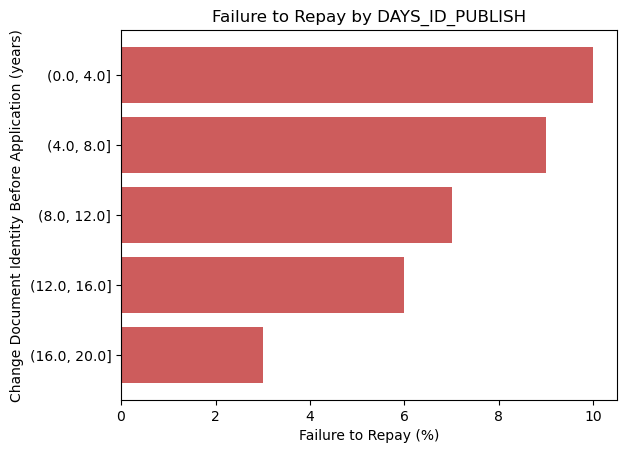

In [49]:
plt.barh(data_publish.index.astype(str), round(100*data_publish['TARGET']), color='indianred')

plt.ylabel('Change Document Identity Before Application (years)')
plt.xlabel('Failure to Repay (%)')
plt.title('Failure to Repay by DAYS_ID_PUBLISH');
plt.show()

#### Modified FLAG_DOCUMENT_

In [50]:
data['TOTAL_DOCUMENT'] = data['FLAG_DOCUMENT_2'] + data['FLAG_DOCUMENT_3'] + data['FLAG_DOCUMENT_4'] + data['FLAG_DOCUMENT_5'] + data['FLAG_DOCUMENT_6'] + data['FLAG_DOCUMENT_7'] + data['FLAG_DOCUMENT_8'] + data['FLAG_DOCUMENT_9'] + data['FLAG_DOCUMENT_10'] + data['FLAG_DOCUMENT_11'] + data['FLAG_DOCUMENT_12'] + data['FLAG_DOCUMENT_13'] + data['FLAG_DOCUMENT_14'] + data['FLAG_DOCUMENT_15'] + data['FLAG_DOCUMENT_16'] + data['FLAG_DOCUMENT_17'] + data['FLAG_DOCUMENT_18'] + data['FLAG_DOCUMENT_19'] + data['FLAG_DOCUMENT_20'] + data['FLAG_DOCUMENT_21'] 

In [51]:
import re
regex = re.compile('FLAG_DOCUMENT_')
col = [i for i in data.columns if re.match(regex, i)]

data.drop(columns = [i for i in data.columns if re.match(regex, i)], inplace=True)

In [52]:
data['TOTAL_DOCUMENT'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [53]:
data['TOTAL_DOCUMENT'].value_counts()

1    270056
0     29549
2      7742
3       163
4         1
Name: TOTAL_DOCUMENT, dtype: int64

#### AMT_ANNUITY

In [54]:
data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [55]:
data_amt_annuity = data[['TARGET', 'AMT_ANNUITY']]
data_amt_annuity['AMT_ANNUITY_GROUP'] = pd.cut(data_amt_annuity['AMT_ANNUITY'], bins = np.linspace(1500, 300000, num=6))
data_amt_annuity = (data_amt_annuity.groupby(['AMT_ANNUITY_GROUP']).mean()).sort_values('TARGET')
data_amt_annuity

,TARGET,AMT_ANNUITY
AMT_ANNUITY_GROUP,,
"(180600.0, 240300.0]",0.000000,218804.328947
"(240300.0, 300000.0]",0.000000,258025.500000
"(120900.0, 180600.0]",0.020134,137664.241611
"(61200.0, 120900.0]",0.041421,72167.335456
"(1500.0, 61200.0]",0.081751,25907.555699


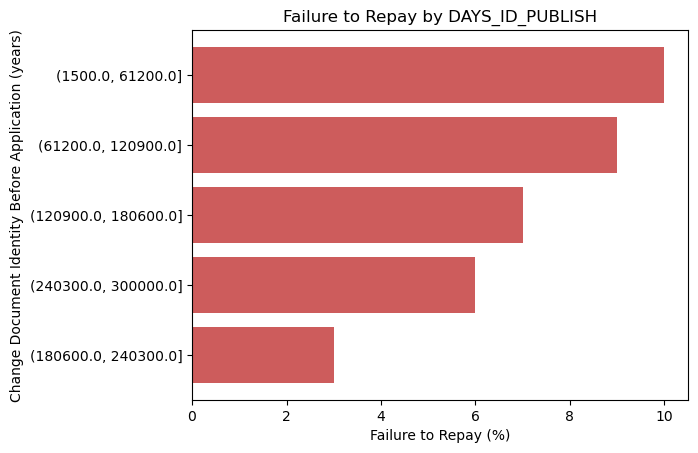

In [56]:
plt.barh(data_amt_annuity.index.astype(str), round(100*data_publish['TARGET']), color='indianred')

plt.ylabel('Change Document Identity Before Application (years)')
plt.xlabel('Failure to Repay (%)')
plt.title('Failure to Repay by DAYS_ID_PUBLISH');
plt.show()

#### Replace XNA values with NaN

In [57]:
for col in data.select_dtypes(include = ["object"]).columns:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count kolom CODE_GENDER:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Value count kolom FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Value count kolom FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Value count kolom NAME_TYPE_SUITE:
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Value count kolom NAME_INCOME_TYPE:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Va

In [58]:
data.CODE_GENDER.replace("XNA", np.nan, inplace=True)
data.ORGANIZATION_TYPE.replace("XNA", np.nan, inplace=True)

#### Dropping the column with 25% more missing values

In [59]:
data.shape

(307511, 105)

In [60]:
count = data.isnull().sum().sort_values(ascending=False)
percentage = ((data.isnull().sum()/len(data)*100)).sort_values(ascending=False)

data_missing = pd.concat([count, percentage],
                                axis =1,
                                keys = ['count', 'percentage']).reset_index()
data_missing.loc[data_missing['percentage'] > 25]

,index,count,percentage
0,COMMONAREA_MODE,214865,69.872297
1,COMMONAREA_MEDI,214865,69.872297
2,COMMONAREA_AVG,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
5,NONLIVINGAPARTMENTS_AVG,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_AVG,210199,68.354953
8,LIVINGAPARTMENTS_MODE,210199,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,68.354953


In [61]:
data.drop(columns=list(data_missing['index'].loc[data_missing['percentage'] >60]),inplace=True)
data.shape

(307511, 88)

In [62]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,TOTAL_DOCUMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,1


#### Missing value

In [63]:
null = data.isnull().sum().reset_index()
null_table = null.loc[null[0] > 0]
null_table.shape

(55, 2)

Terdapat 55 kolom dengan data yang hilang

In [64]:
data_null = data[null_table['index'].tolist()]
data_null

,CODE_GENDER,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN
0,M,24700.5,351000.0,Unaccompanied,1.0,Laborers,1.0,Business Entity Type 3,0.083037,0.262949,...,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
1,F,35698.5,1129500.0,Family,3.0,Core staff,2.0,School,0.311267,0.622246,...,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0
2,M,6750.0,135000.0,Unaccompanied,0.0,Laborers,1.0,Government,NaN,0.555912,...,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,F,29686.5,297000.0,Unaccompanied,8.0,Laborers,2.0,Business Entity Type 3,NaN,0.650442,...,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
4,M,21865.5,513000.0,Unaccompanied,8.0,Core staff,1.0,Religion,NaN,0.322738,...,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,M,27558.0,225000.0,Unaccompanied,0.0,Sales staff,1.0,Services,0.145570,0.681632,...,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
307507,F,12001.5,225000.0,Unaccompanied,NaN,NaN,1.0,NaN,NaN,0.115992,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
307508,F,29979.0,585000.0,Unaccompanied,21.0,Managers,1.0,School,0.744026,0.535722,...,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0
307509,F,20205.0,319500.0,Unaccompanied,13.0,Laborers,2.0,Business Entity Type 1,NaN,0.514163,...,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [65]:
data_null.select_dtypes(exclude = ["object"] ).shape[1]

48

In [66]:
data_null.select_dtypes(include = ["object"] ).shape[1]

7

In [67]:
def miss_numerical(data):
    
    numerical_features = data.select_dtypes(exclude = ["object"] ).columns
    for f in numerical_features:
        data[f] = data[f].fillna(data[f].median())
    return data

def miss_categorical(data):
    
    categorical_features = data.select_dtypes(include = ["object"]).columns
    for f in categorical_features:
        data[f] = data[f].fillna(data[f].mode()[0])
    return data

def transform_feature(data):
    data = miss_numerical(data)
    data = miss_categorical(data)
    return data

data = transform_feature(data)
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,TOTAL_DOCUMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,4.0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,-273.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,1
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,1
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0,1
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1


In [68]:
null = data.isnull().sum().reset_index()
null_table = null.loc[null[0] > 0]
null_table.shape

(0, 2)

Data telah dibersihkan

In [69]:
from sklearn.preprocessing import MinMaxScaler
def encoder(data):
    scaler = MinMaxScaler()
    numerical = data.select_dtypes(exclude = ["object"]).columns
    numerical1 = numerical[2:4]
    numerical2 = numerical[5:]
    numerical_all = numerical1 | numerical2
    features_transform = pd.DataFrame(data=data)
    features_transform[numerical_all] = scaler.fit_transform(data[numerical_all])
    display(features_transform.head(n = 5))
    return data

data = encoder(data)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,TOTAL_DOCUMENT
0,100002,1,Cash loans,M,N,Y,0.0,0.001512,406597.5,0.090032,...,0.735788,0.0,0.0,0.0,0.0,0.0,0.04,0.000000,0.060870,0.25
1,100003,0,Cash loans,F,N,N,0.0,0.002089,1293502.5,0.132924,...,0.807083,0.0,0.0,0.0,0.0,0.0,0.00,0.027778,0.026087,0.25
2,100004,0,Revolving loans,M,Y,Y,0.0,0.000358,135000.0,0.020025,...,0.810112,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.008696,0.00
3,100006,0,Cash loans,F,N,Y,0.0,0.000935,312682.5,0.109477,...,0.856244,0.0,0.0,0.0,0.0,0.0,0.04,0.111111,0.026087,0.25
4,100007,0,Cash loans,M,N,Y,0.0,0.000819,513000.0,0.078975,...,0.742311,0.0,0.0,0.0,0.0,0.0,0.00,0.069444,0.000000,0.25


In [70]:
data.shape

(307511, 88)

#### Feature Encoding

In [71]:
data[data.select_dtypes(include = ["object"]).columns].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,block of flats,Panel,No
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,Panel,No
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,block of flats,Panel,No


In [72]:
for col in data.select_dtypes(include = ["object"]).columns:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count kolom CODE_GENDER:
F    202452
M    105059
Name: CODE_GENDER, dtype: int64

Value count kolom FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Value count kolom FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Value count kolom NAME_TYPE_SUITE:
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Value count kolom NAME_INCOME_TYPE:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Value count kolom NA

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

for col in data:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])            
            le_count += 1
           
print('%d columns were label encoded.' % le_count)

5 columns were label encoded.


In [74]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,TOTAL_DOCUMENT
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,1
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,1
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,4.0,1
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,1


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  int32  
 3   CODE_GENDER                   307511 non-null  int32  
 4   FLAG_OWN_CAR                  307511 non-null  int32  
 5   FLAG_OWN_REALTY               307511 non-null  int32  
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [76]:
data.corr()['TARGET'][0:15].sort_values(ascending=False).index

Index(['TARGET', 'CODE_GENDER', 'CNT_CHILDREN', 'SK_ID_CURR',
       'AMT_INCOME_TOTAL', 'FLAG_OWN_REALTY', 'AMT_ANNUITY', 'FLAG_OWN_CAR',
       'AMT_CREDIT', 'NAME_CONTRACT_TYPE', 'REGION_POPULATION_RELATIVE',
       'AMT_GOODS_PRICE', 'YEARS_REGISTRATION', 'YEARS_EMPLOYED', 'AGE'],
      dtype='object')

In [77]:
corr_matrix = data.corr()
corr_matrix

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,TOTAL_DOCUMENT
SK_ID_CURR,1.000000,-0.002108,0.001654,-0.000728,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000431,...,-0.000859,-0.002517,-0.002066,0.001879,0.000328,0.000809,0.004071,0.002991,0.002172,-0.001679
TARGET,-0.002108,1.000000,-0.030896,0.054713,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012815,...,0.055218,-0.000074,0.001701,-0.001306,-0.014794,-0.005833,0.012161,0.020216,-0.000469,0.017193
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,-0.008783,0.004022,0.067177,0.029998,-0.003531,-0.221648,-0.241541,...,0.061830,0.000121,-0.004977,-0.014769,-0.014341,-0.021448,-0.049643,-0.062329,-0.034312,-0.773355
CODE_GENDER,-0.000728,0.054713,-0.008783,1.000000,0.345841,-0.044380,0.047382,0.074730,0.021601,0.076993,...,0.025283,0.002301,0.000523,-0.002862,0.005767,-0.009683,-0.020706,-0.033741,-0.052657,0.017880
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,0.345841,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141587,...,-0.039089,0.003678,0.001514,0.002822,0.023536,-0.004081,-0.026124,-0.003954,0.041222,0.015428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_QRT,0.000809,-0.005833,-0.021448,-0.009683,-0.004081,0.012013,-0.004913,0.007924,0.020379,0.010685,...,-0.010018,0.000725,-0.001551,-0.007466,0.005318,1.000000,0.095723,0.127183,0.019821,0.014383
AMT_REQ_CREDIT_BUREAU_YEAR,0.004071,0.012161,-0.049643,-0.020706,-0.026124,0.058687,-0.034874,0.015821,-0.036634,-0.008286,...,-0.116385,0.000361,0.000742,0.029318,0.013708,0.095723,1.000000,0.547092,0.055025,0.005301
TOTAL_PREV_APP,0.002991,0.020216,-0.062329,-0.033741,-0.003954,0.049097,-0.026474,0.028282,-0.013527,0.000420,...,-0.129687,0.000293,0.002027,0.021034,0.042128,0.127183,0.547092,1.000000,0.184009,0.038133
TOTAL_BUREAU_LOAN,0.002172,-0.000469,-0.034312,-0.052657,0.041222,0.006884,0.005572,0.048978,0.055780,0.023635,...,-0.126687,0.005993,0.007172,0.020995,0.158325,0.019821,0.055025,0.184009,1.000000,0.027638


In [78]:
categ = ['NAME_TYPE_SUITE','NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE'   ]
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,TOTAL_DOCUMENT
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,1
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,1
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,4.0,1
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,-273.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,1
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,1
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0,1
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1


In [79]:
corr_matrix = data.corr()
corr_matrix

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,TOTAL_DOCUMENT
SK_ID_CURR,1.000000,-0.002108,0.001654,-0.000728,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000431,...,-0.000859,-0.002517,-0.002066,0.001879,0.000328,0.000809,0.004071,0.002991,0.002172,-0.001679
TARGET,-0.002108,1.000000,-0.030896,0.054713,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012815,...,0.055218,-0.000074,0.001701,-0.001306,-0.014794,-0.005833,0.012161,0.020216,-0.000469,0.017193
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,-0.008783,0.004022,0.067177,0.029998,-0.003531,-0.221648,-0.241541,...,0.061830,0.000121,-0.004977,-0.014769,-0.014341,-0.021448,-0.049643,-0.062329,-0.034312,-0.773355
CODE_GENDER,-0.000728,0.054713,-0.008783,1.000000,0.345841,-0.044380,0.047382,0.074730,0.021601,0.076993,...,0.025283,0.002301,0.000523,-0.002862,0.005767,-0.009683,-0.020706,-0.033741,-0.052657,0.017880
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,0.345841,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141587,...,-0.039089,0.003678,0.001514,0.002822,0.023536,-0.004081,-0.026124,-0.003954,0.041222,0.015428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_QRT,0.000809,-0.005833,-0.021448,-0.009683,-0.004081,0.012013,-0.004913,0.007924,0.020379,0.010685,...,-0.010018,0.000725,-0.001551,-0.007466,0.005318,1.000000,0.095723,0.127183,0.019821,0.014383
AMT_REQ_CREDIT_BUREAU_YEAR,0.004071,0.012161,-0.049643,-0.020706,-0.026124,0.058687,-0.034874,0.015821,-0.036634,-0.008286,...,-0.116385,0.000361,0.000742,0.029318,0.013708,0.095723,1.000000,0.547092,0.055025,0.005301
TOTAL_PREV_APP,0.002991,0.020216,-0.062329,-0.033741,-0.003954,0.049097,-0.026474,0.028282,-0.013527,0.000420,...,-0.129687,0.000293,0.002027,0.021034,0.042128,0.127183,0.547092,1.000000,0.184009,0.038133
TOTAL_BUREAU_LOAN,0.002172,-0.000469,-0.034312,-0.052657,0.041222,0.006884,0.005572,0.048978,0.055780,0.023635,...,-0.126687,0.005993,0.007172,0.020995,0.158325,0.019821,0.055025,0.184009,1.000000,0.027638


In [80]:
corr_abs = data.corr().abs()
corr_abs

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,TOTAL_DOCUMENT
SK_ID_CURR,1.000000,0.002108,0.001654,0.000728,0.001216,0.000703,0.001129,0.001820,0.000343,0.000431,...,0.000859,0.002517,0.002066,0.001879,0.000328,0.000809,0.004071,0.002991,0.002172,0.001679
TARGET,0.002108,1.000000,0.030896,0.054713,0.021851,0.006148,0.019187,0.003982,0.030369,0.012815,...,0.055218,0.000074,0.001701,0.001306,0.014794,0.005833,0.012161,0.020216,0.000469,0.017193
NAME_CONTRACT_TYPE,0.001654,0.030896,1.000000,0.008783,0.004022,0.067177,0.029998,0.003531,0.221648,0.241541,...,0.061830,0.000121,0.004977,0.014769,0.014341,0.021448,0.049643,0.062329,0.034312,0.773355
CODE_GENDER,0.000728,0.054713,0.008783,1.000000,0.345841,0.044380,0.047382,0.074730,0.021601,0.076993,...,0.025283,0.002301,0.000523,0.002862,0.005767,0.009683,0.020706,0.033741,0.052657,0.017880
FLAG_OWN_CAR,0.001216,0.021851,0.004022,0.345841,1.000000,0.002817,0.102023,0.083383,0.116225,0.141587,...,0.039089,0.003678,0.001514,0.002822,0.023536,0.004081,0.026124,0.003954,0.041222,0.015428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_QRT,0.000809,0.005833,0.021448,0.009683,0.004081,0.012013,0.004913,0.007924,0.020379,0.010685,...,0.010018,0.000725,0.001551,0.007466,0.005318,1.000000,0.095723,0.127183,0.019821,0.014383
AMT_REQ_CREDIT_BUREAU_YEAR,0.004071,0.012161,0.049643,0.020706,0.026124,0.058687,0.034874,0.015821,0.036634,0.008286,...,0.116385,0.000361,0.000742,0.029318,0.013708,0.095723,1.000000,0.547092,0.055025,0.005301
TOTAL_PREV_APP,0.002991,0.020216,0.062329,0.033741,0.003954,0.049097,0.026474,0.028282,0.013527,0.000420,...,0.129687,0.000293,0.002027,0.021034,0.042128,0.127183,0.547092,1.000000,0.184009,0.038133
TOTAL_BUREAU_LOAN,0.002172,0.000469,0.034312,0.052657,0.041222,0.006884,0.005572,0.048978,0.055780,0.023635,...,0.126687,0.005993,0.007172,0.020995,0.158325,0.019821,0.055025,0.184009,1.000000,0.027638


In [81]:
corr_abs['TARGET'][0:15].sort_values(ascending=False).index

Index(['TARGET', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE',
       'AMT_GOODS_PRICE', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'FLAG_OWN_CAR',
       'CNT_CHILDREN', 'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'FLAG_OWN_REALTY',
       'NAME_FAMILY_STATUS', 'AMT_INCOME_TOTAL', 'SK_ID_CURR'],
      dtype='object')

In [82]:
unstack = corr_abs.unstack()
sort_unstack = unstack.sort_values(ascending = False)

In [83]:
pd.set_option('display.max_rows', None)
print(sort_unstack['TARGET'].shape)
sort_unstack['TARGET'].head()

(88,)


TARGET          1.000000
EXT_SOURCE_2    0.160295
EXT_SOURCE_3    0.155892
EXT_SOURCE_1    0.098887
AGE             0.078234
dtype: float64

In [84]:
sort_unstack['TARGET'][0:15].index

Index(['TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'AGE',
       'YEARS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
       'YEARS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'NAME_INCOME_TYPE',
       'FLAG_EMP_PHONE'],
      dtype='object')

## Imbalance Handling

In [86]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,TOTAL_DOCUMENT
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,1
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,1
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,4.0,1
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,1


In [87]:
# Remove SK_ID_CURR
df = data.drop(['SK_ID_CURR'], axis=1)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,TOTAL_DOCUMENT
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,1
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,1
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,4.0,1
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,1


In [88]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Persebaran data tidak seimbang

In [89]:
df['TARGET'].value_counts(normalize= True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [90]:
from sklearn.utils import resample
df_major = df[(df['TARGET']==0)]
df_minor = df[(df['TARGET']==1)]

df_minor_up = resample(df_minor, replace = True, n_samples = 240138, random_state = 42)
df_major_down = resample(df_major, replace = True, n_samples = 240138, random_state = 42)
df_upsampled = pd.concat([df_minor_up,df_major_down])

In [91]:
df_upsampled['TARGET'].value_counts()

1    240138
0    240138
Name: TARGET, dtype: int64

In [92]:
df_upsampled.shape

(480276, 87)

In [93]:
df_upsampled.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,TOTAL_DOCUMENT
292662,1,0,0,1,1,0,108000.0,213322.5,15651.0,162000.0,...,-565.0,0.0,0.0,0.0,1.0,0.0,5.0,6.0,1.0,1
194394,1,0,0,0,0,1,99000.0,450000.0,35685.0,450000.0,...,-578.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,8.0,1
11104,1,0,0,0,0,1,270000.0,1206954.0,31968.0,945000.0,...,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2
66953,1,0,1,1,1,2,270000.0,521280.0,31630.5,450000.0,...,-820.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,9.0,1
266717,1,0,0,0,1,0,225000.0,454500.0,16825.5,454500.0,...,-265.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,11.0,1


# MODELING

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [94]:
# Everything except target variable
X = df_upsampled.drop("TARGET", axis=1)

# Target variable
y = df_upsampled.TARGET.values

In [97]:
X.tail()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,TOTAL_DOCUMENT
205962,0,0,0,1,1,90000.0,728460.0,73651.5,675000.0,1,...,-1074.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1
162043,0,0,1,1,2,225000.0,1563840.0,64669.5,1350000.0,6,...,-755.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
123376,1,0,0,1,0,112500.0,135000.0,6750.0,135000.0,5,...,-49.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0
218249,0,0,0,1,0,139500.0,254700.0,14751.0,225000.0,6,...,-1110.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,5.0,1
224698,0,1,0,0,0,67500.0,93829.5,9985.5,81000.0,5,...,-646.0,0.0,0.0,0.0,0.0,2.0,1.0,5.0,1.0,1


In [98]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [99]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [100]:
X_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV_APP,TOTAL_BUREAU_LOAN,TOTAL_DOCUMENT
123297,0,0,1,1,1,180000.0,315666.0,35829.0,292500.0,6,...,-356.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,8.0,1
112619,0,0,0,1,0,225000.0,635962.5,37998.0,549000.0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,1
72960,0,0,0,1,0,90000.0,254799.0,16411.5,193500.0,6,...,-781.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,9.0,1
235247,0,0,1,0,0,135000.0,312768.0,15966.0,270000.0,6,...,-986.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,1
81017,0,1,1,0,1,76500.0,225000.0,14377.5,225000.0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1


In [101]:
X_train.shape

(384220, 86)

In [102]:
y_train.shape

(384220,)

In [103]:
X_test.shape

(96056, 86)

In [104]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [105]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.8731677354876323,
 'Logistic Regression': 0.5685849920879487,
 'Random Forest': 0.9961689014741401}

## MODEL COMPARISON

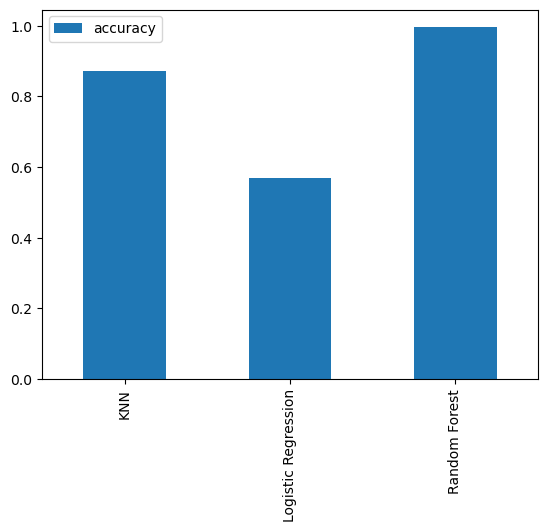

In [106]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

## Hyperparameter Tuning

In [107]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 100, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [108]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()


In [109]:
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [110]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_depth': None}

In [111]:
rs_rf.score(X_test, y_test)

0.9819480303156493

# Evaluating

In [112]:
y_preds = rs_rf.predict(X_test)

In [113]:
y_preds

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [114]:
y_test

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

## ROC & AUC

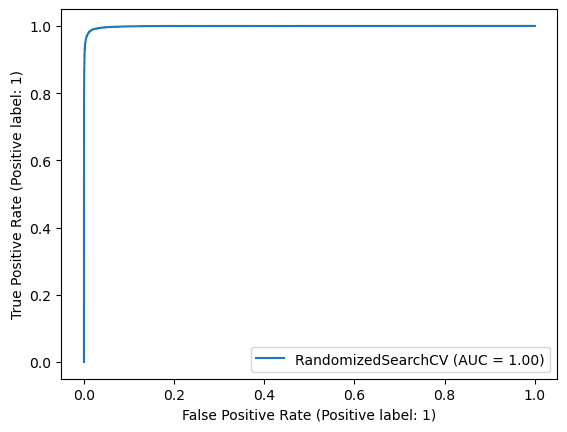

In [116]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_rf, X_test, y_test);

### Confusion Matrix

In [117]:
print(confusion_matrix(y_test, y_preds))

[[46648  1353]
 [  381 47674]]


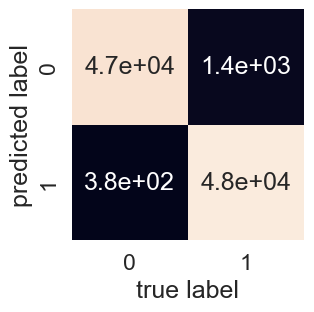

In [118]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

### Classification Report

In [119]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     48001
           1       0.97      0.99      0.98     48055

    accuracy                           0.98     96056
   macro avg       0.98      0.98      0.98     96056
weighted avg       0.98      0.98      0.98     96056



In [120]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_depth': None}

In [121]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = RandomForestClassifier(n_estimators = 60,
                             min_samples_split = 4,
                             min_samples_leaf = 5,
                             max_depth = None)

In [122]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.98272882, 0.98292645, 0.98134402, 0.98287439, 0.98306179])

In [141]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9825870954581752

In [123]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.9723038295708722

In [124]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9936203349560516

In [125]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.9824715988584357

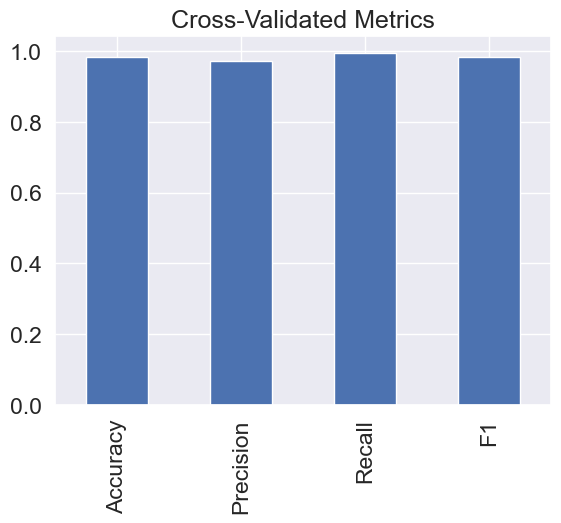

In [142]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [143]:
clf = RandomForestClassifier(n_estimators = 60,
                             min_samples_split = 4,
                             min_samples_leaf = 5,
                             max_depth = None)

clf.fit(X_train, y_train);

In [144]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

EXT_SOURCE_2                    0.087905
EXT_SOURCE_3                    0.087563
EXT_SOURCE_1                    0.037110
AMT_ANNUITY                     0.036296
DAYS_LAST_PHONE_CHANGE          0.036068
AMT_CREDIT                      0.034785
AGE                             0.032567
AMT_GOODS_PRICE                 0.030709
YEARS_EMPLOYED                  0.028118
REGION_POPULATION_RELATIVE      0.027715
YEARS_REGISTRATION              0.027616
AMT_INCOME_TOTAL                0.026024
YEARS_ID_PUBLISH                0.022892
HOUR_APPR_PROCESS_START         0.021637
TOTAL_PREV_APP                  0.021282
TOTAL_BUREAU_LOAN               0.020237
ORGANIZATION_TYPE               0.018318
WEEKDAY_APPR_PROCESS_START      0.016024
OCCUPATION_TYPE                 0.014461
AMT_REQ_CREDIT_BUREAU_YEAR      0.014291
OBS_60_CNT_SOCIAL_CIRCLE        0.011720
OBS_30_CNT_SOCIAL_CIRCLE        0.011498
TOTALAREA_MODE                  0.011496
NAME_EDUCATION_TYPE             0.010709
LIVINGAREA_MODE 

In [145]:
print(type(feature_scores))

<class 'pandas.core.series.Series'>


In [146]:
feature_scores.index

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'AMT_ANNUITY',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AGE', 'AMT_GOODS_PRICE',
       'YEARS_EMPLOYED', 'REGION_POPULATION_RELATIVE', 'YEARS_REGISTRATION',
       'AMT_INCOME_TOTAL', 'YEARS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START',
       'TOTAL_PREV_APP', 'TOTAL_BUREAU_LOAN', 'ORGANIZATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'OCCUPATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'TOTALAREA_MODE', 'NAME_EDUCATION_TYPE',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'LANDAREA_MEDI', 'APARTMENTS_AVG',
       'LANDAREA_MODE', 'NAME_FAMILY_STATUS', 'APARTMENTS_MEDI',
       'BASEMENTAREA_AVG', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI',
       'CNT_FAM_MEMBERS', 'BASEMENTAREA_MODE', 'APARTMENTS_MODE',
       'NAME_INCOME_TYPE', 'NONLIVINGARE

In [147]:
feature_scores_df = feature_scores.to_frame().reset_index()

In [148]:
feature_scores_df.head()

,index,0
0,EXT_SOURCE_2,0.087905
1,EXT_SOURCE_3,0.087563
2,EXT_SOURCE_1,0.037110
3,AMT_ANNUITY,0.036296
4,DAYS_LAST_PHONE_CHANGE,0.036068


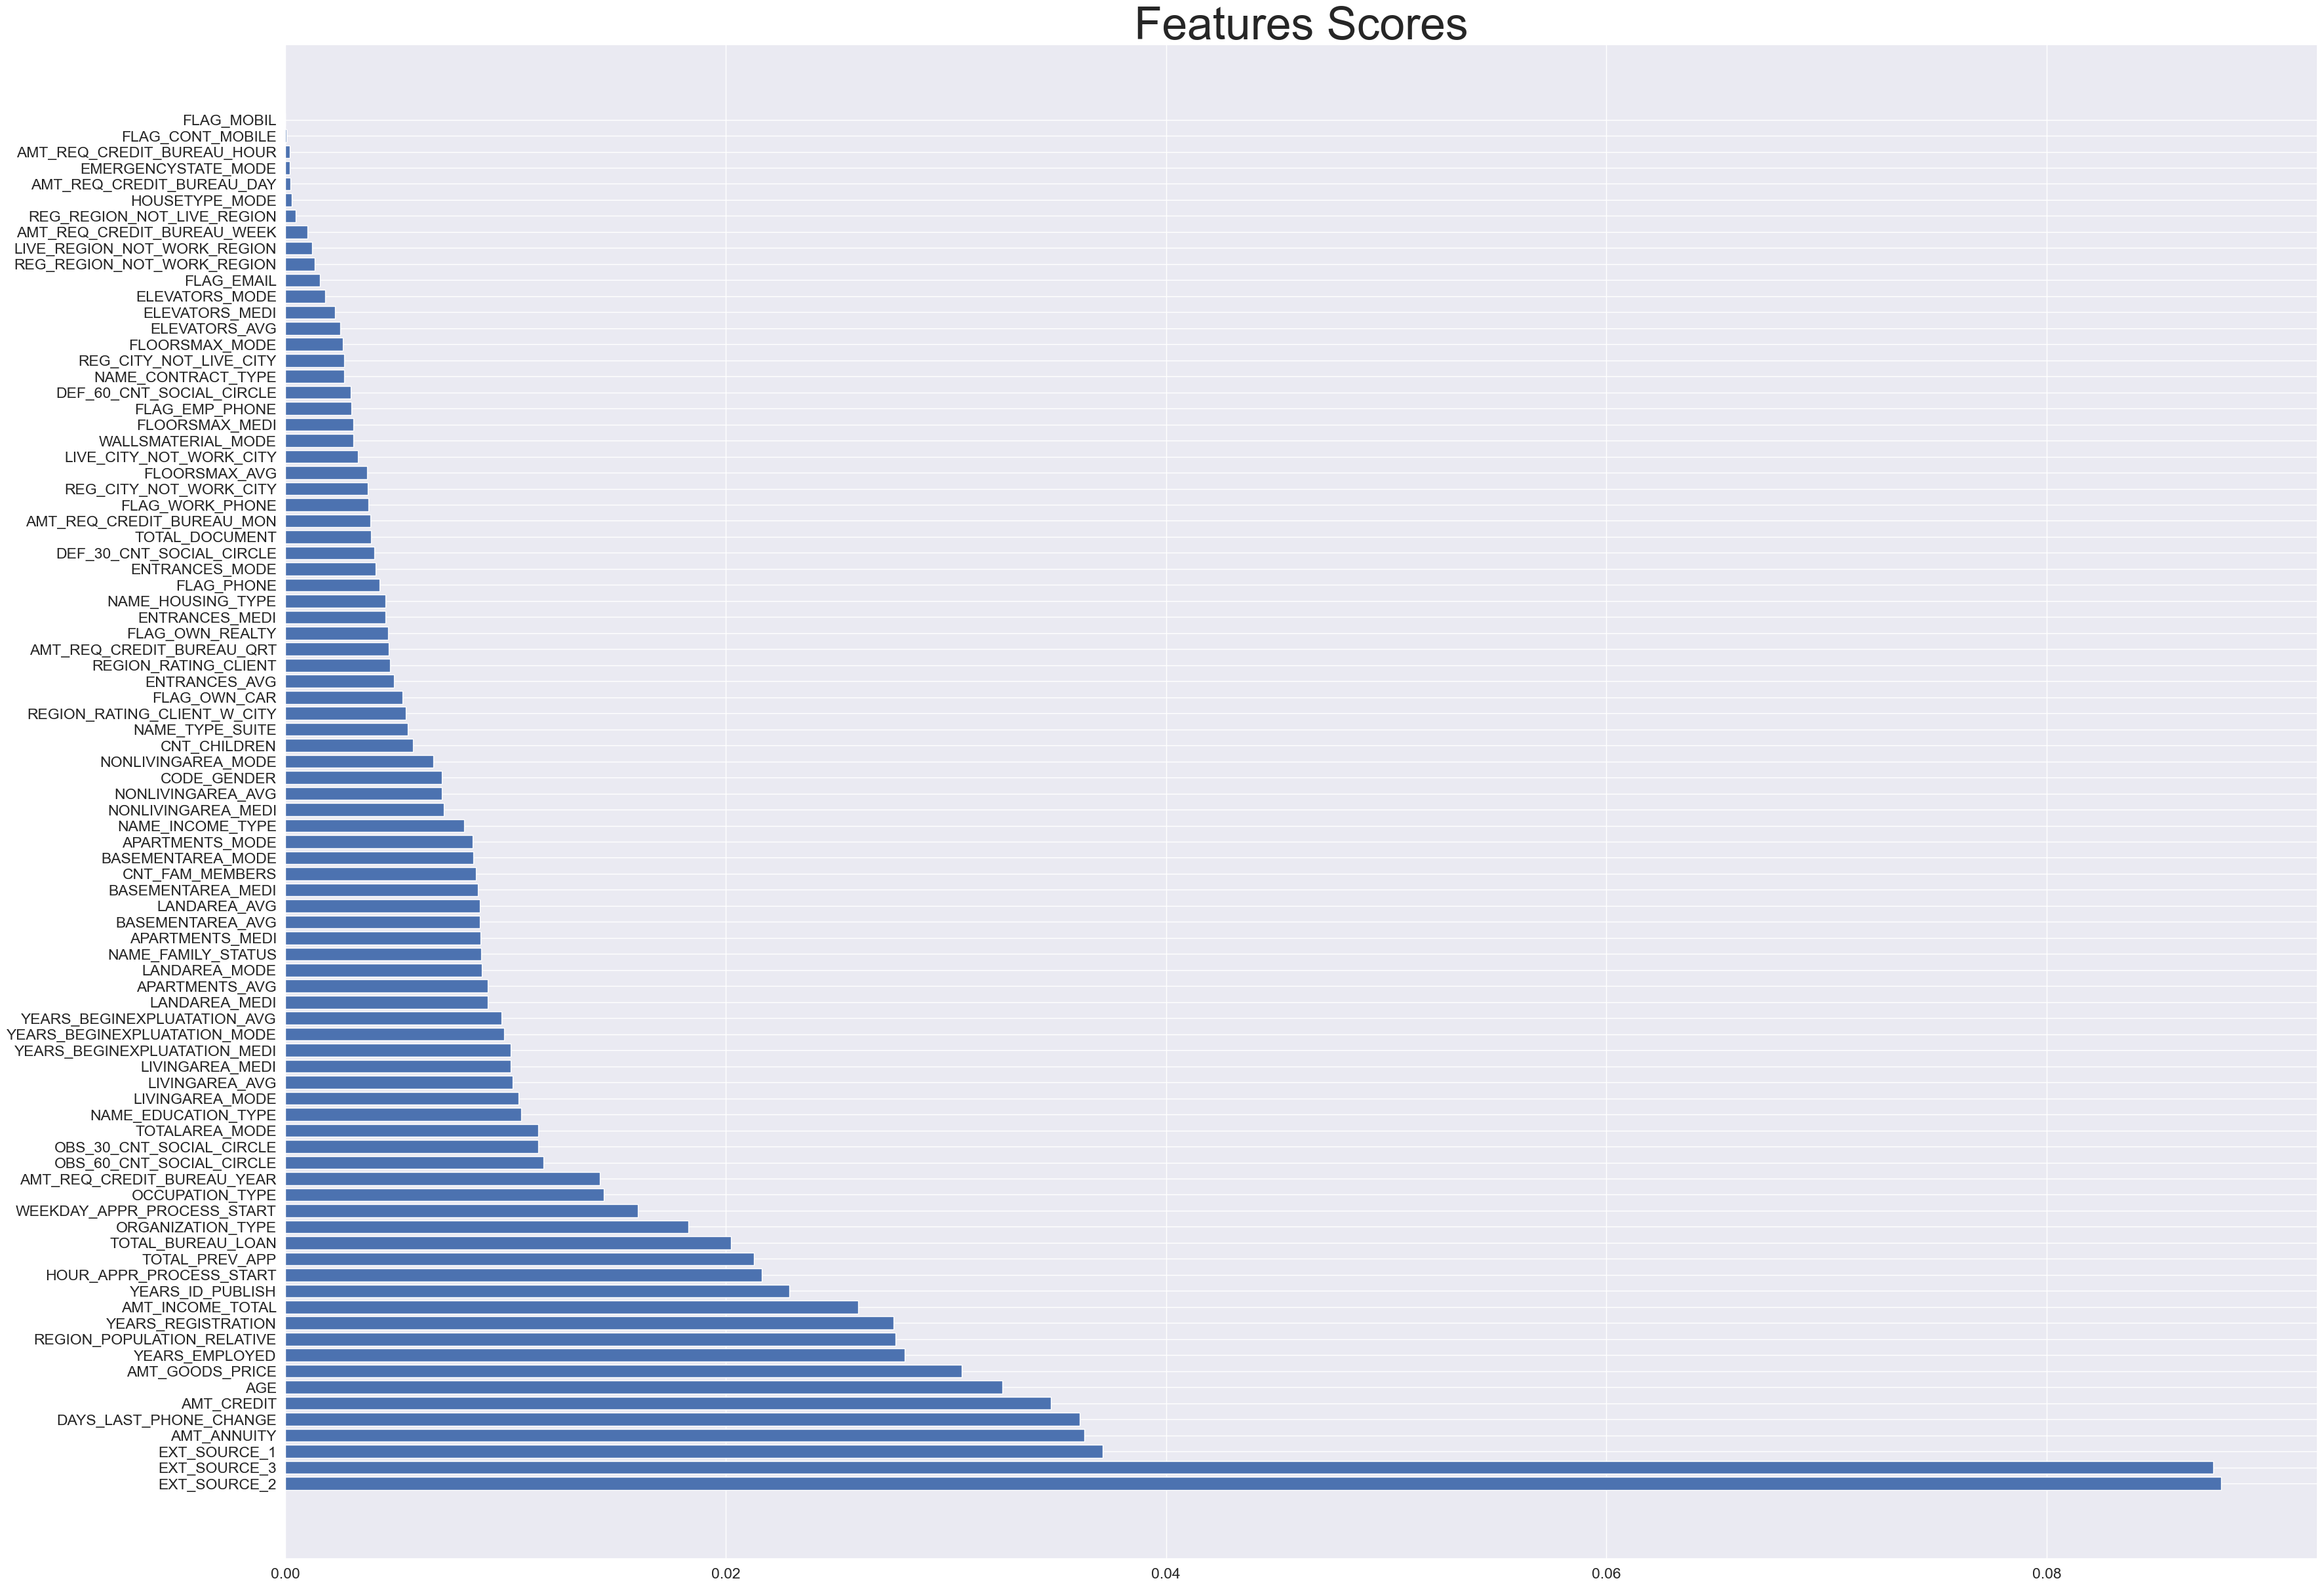

In [149]:
feature = feature_scores_df['index']
corr = feature_scores_df[0]

fig, ax = plt.subplots(figsize =(40, 30))
ax.barh(feature, corr)
plt.title('Features Scores', fontsize = 50)
plt.show()

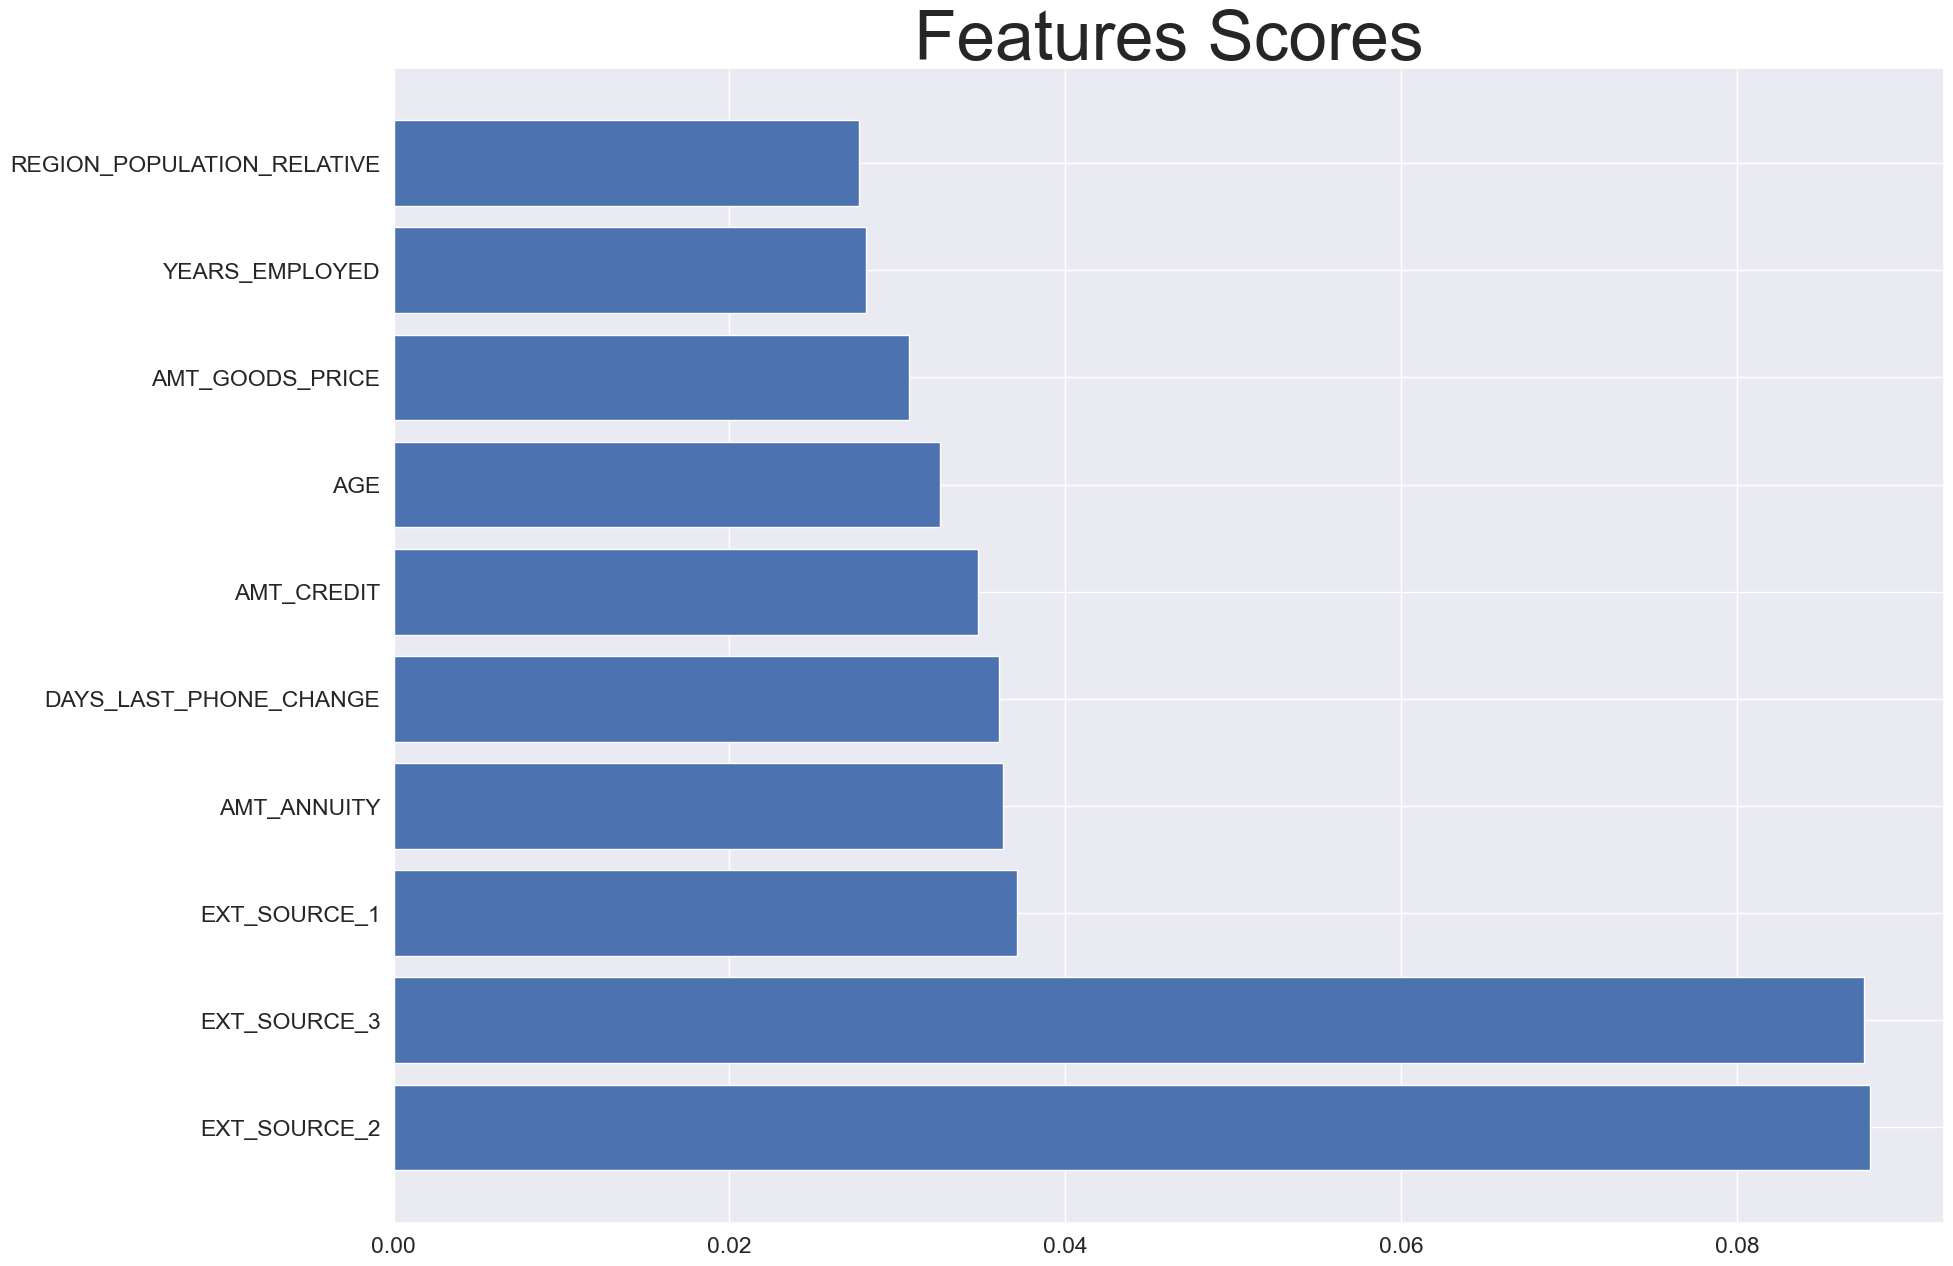

In [150]:
# Top 10 Feature
feature = feature_scores_df['index'].head(10)
corr = feature_scores_df[0].head(10)

fig, ax = plt.subplots(figsize =(20, 15))
ax.barh(feature, corr)
plt.title('Features Scores', fontsize = 50)
plt.show()